<a href="https://colab.research.google.com/github/kenyonacton/fruits-360-image-classification-CNN/blob/main/W7_KA_Image_Classification_Fruits_360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification with Fruits 360 Dataset

2022/12/12

Final Project

MSDS 686 Deep Learning 

Regis University

## Overview of assignment

This project explores data analysis and deep learning with a multiclass image classification problem. The dataset is Fruits 360, which can be found here: https://www.kaggle.com/datasets/moltean/fruits


## Credits
This notebook adapts code from MSDS course materials, and tutorials/examples here:

https://www.kaggle.com/code/priesterkc/fruits360-project-kpriester

https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

https://stackoverflow.com/questions/69239296/how-to-get-confusion-matrix-and-roc-curve-when-using-flow-from-directory


## Dataset citation

Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.


##  Description of data

The dataset has a total of 90483 images of 131 fruits and their corresponding labels. This project uses the fruits-350_dataset in which images have been scaled to the same size. The initial training set used contains 67692 training images and 22688 test images, each image containing one fruit or vegetable.



## Summary of methods

Project includes:

• Loading data via Kaggle with Kaggle API

• EDA: plotting images, examining classes

• Data preparation: splitting into train, validation, and test sets

• Data augmentation 

• Convolution

• Max pooling

• Dropout

• Kernel initializer

• Learning rate optimization

• Confusion matrix

• Plots of accuracy/loss vs epochs

• Evaluation of test accuracy


## Summary of model

The model is a convolutional neural network utilizing convolution, max pooling, batch normalization, dropout, kernel initializer, and learning rate scheduler. 

## Analysis of results

The results of this model are fairly accurate, reaching around 94%-96% accuracy, however other approaches with this dataset have reached much higher accuracy. Further improvements of the architecture and paramaterization could greatly improve this model. Transfer learning may help the model train faster by utilizing previously trained neural networks.





# Project Rubric

## Data Analysis: Required
(All bullets must be completed for 80%)

Show/plot sample images or data with labels. *

Use validation data *

Evaluate model on test data *

## Include at least one of the following:

• Convolution *

• Max Pooling *

• Batch Normalization *

• Dropout *

• LSTM

• TF-IDf



## Data Analysis: Additional - do five (including one not covered in class)
(Each bullet is worth 4% up to 20% additional)

Use Data augmentation *

Learning rate optimization *

Functional API model

Transfer learning with or without trainable parameters

Confusion matrix and/or ROC plots *

Plots of accuracy/loss vs epochs *

Show/plot sample incorrect prediction with labels and correct label

## Use at least one of the following that was not covered in class:

Kernels *

Activation functions

Loss functions

Libraries

Methods

## Write up: Required

Overview of assignment *

Description of data *

Summary of methods * 
 
Summary of model *

Analysis of results *
 
## Write up: Additional - do at least one:

Make a YouTube video walking through your project and notebook.

Publish notebook (make Kaggle notebook public, publish to Github, publish to blog, etc.) *


# Set up workspace: Colab formatting and library imports

---



In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [23]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, backend
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import string
import re
np.random.seed(1)
import os
import shutil
from collections import Counter
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from PIL import Image
from glob import glob



# Load data from Kaggle

In [4]:
# Download and install Kaggle package
! pip install kaggle -q

In [5]:
# Make a Kaggle dirrectory
! mkdir ~/.kaggle

#### Upload your kaggle.json API file

In [6]:
# Copy your kaggle.json file to the newly creadted Kaggle folder
! cp kaggle.json ~/.kaggle/

In [7]:
# Change permission of the the ,json file.
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Download the dataset, unzip, and remove zip:
# Credit: https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

# Downloading and unzip dataset
! kaggle datasets download -d moltean/fruits
! unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

# EDA

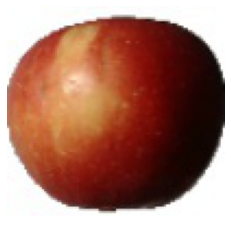

(100, 100, 3)


In [9]:
# Setting Training & Test dir paths
train_path = './fruits-360_dataset/fruits-360/Training/'
test_path = './fruits-360_dataset/fruits-360/Test/'
# Displaying the image
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
# Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

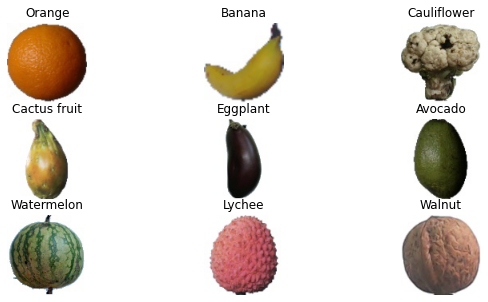

In [11]:
# Visualizing more Images
# Credit https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [12]:
# Number of classes - we can use this for our final layer.
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [16]:
# Look into the data directory and designate classes.
data_dir = './fruits-360_dataset/fruits-360/'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/Training')
print(classes)

['Apple Golden 2', 'Grape Blue', 'Pear Monster', 'Granadilla', 'Banana', 'Blueberry', 'Apple Crimson Snow', 'Guava', 'Lychee', 'Cucumber Ripe', 'Avocado ripe', 'Kohlrabi', 'Cherry 2', 'Corn', 'Apple Red 3', 'Grape White', 'Apple Golden 1', 'Apple Red Yellow 2', 'Tomato Heart', 'Pineapple Mini', 'Tomato Cherry Red', 'Cherry 1', 'Tomato Maroon', 'Tomato Yellow', 'Grape White 2', 'Kaki', 'Avocado', 'Peach 2', 'Potato Red Washed', 'Physalis with Husk', 'Limes', 'Pear Stone', 'Nut Pecan', 'Peach', 'Pear Red', 'Apple Red 2', 'Eggplant', 'Corn Husk', 'Pear Forelle', 'Cherry Wax Yellow', 'Apple Red Yellow 1', 'Cucumber Ripe 2', 'Cantaloupe 2', 'Kumquats', 'Pomelo Sweetie', 'Potato Red', 'Pitahaya Red', 'Potato Sweet', 'Onion Red', 'Potato White', 'Pepper Red', 'Tomato 4', 'Orange', 'Cactus fruit', 'Grape Pink', 'Onion Red Peeled', 'Tomato 2', 'Pear Kaiser', 'Mango Red', 'Mulberry', 'Watermelon', 'Nectarine', 'Dates', 'Pepper Yellow', 'Apple Red 1', 'Melon Piel de Sapo', 'Peach Flat', 'Apple Go

In [18]:
# Prepare data generator, validation data with 20% of train data, and normalize pixel values.
# Credit https://www.kaggle.com/code/priesterkc/fruits360-project-kpriester

image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

BATCH_SIZE = 50
IMG_HEIGHT = 100
IMG_WIDTH = 100


train_dir = data_dir + '/Training'
test_dir = data_dir + '/Test'

CLASS_NAMES = os.listdir(train_dir)




# create image generator with images randomized
train_data_gen = image_generator.flow_from_directory(directory=train_dir,
                                                     batch_size=BATCH_SIZE,
                                                     seed=42,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes=CLASS_NAMES,
                                                     subset='training')

valid_data_gen = image_generator.flow_from_directory(directory=train_dir,
                                                     batch_size=BATCH_SIZE,
                                                     seed=42,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes=CLASS_NAMES,
                                                     subset='validation')

test_data_gen = image_generator.flow_from_directory(directory=test_dir,
                                                    batch_size=BATCH_SIZE,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    classes=CLASS_NAMES,
                                                    shuffle=False)

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [20]:
# View shape before processing

for x, y in train_data_gen:
  print("input shape: ", x.shape)
  print("input type: ", x.dtype)
  print("targets shape: ", y.shape)
  print("targets type: ", y.dtype)
  print("x[0] input text: ", x[0])
  print("y targets: ", y)
  break

input shape:  (50, 100, 100, 3)
input type:  float32
targets shape:  (50, 131)
targets type:  float32
x[0] input text:  [[[1.        0.9960785 0.9921569]
  [1.        0.9960785 0.9921569]
  [1.        0.9960785 1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        0.9960785 0.9921569]
  [1.        1.        0.9921569]
  [1.        0.9960785 1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        0.9960785 1.       ]
  [1.        0.9960785 1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 ...

 [[1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  ...
  [1.        1.        1.       ]
  [1.        1.        1.       ]
  [1.        1.        1.       ]]

 [[1.        1.        1. 

# Build the model using convolution, batch normalization, max pooling, dropout, and a kernel initializer


In [59]:
# Build the model using convolution, batch normalization, max pooling, dropout, and a kernel initializer
# Credit: https://www.kaggle.com/code/priesterkc/fruits360-project-kpriester
# https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

# Variables for data in model
STEPS_PER_EPOCH = train_data_gen.samples // BATCH_SIZE
VALID_STEPS = valid_data_gen.samples // BATCH_SIZE
EPOCHS = 20

# clear previous tensorflow model graphs
backend.clear_session()

# resolution size of each image
x_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

# build model structure
model = models.Sequential()

# input layer
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=x_shape))

# hidden layers
model.add(BatchNormalization())
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32, kernel_size=(3,3), kernel_initializer='uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64, kernel_size=(3,3), kernel_initializer='uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))

#ouput layer
model.add(layers.Dense(len(CLASS_NAMES), activation='softmax'))

# show model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                                        

In [60]:
# Use learning rate schedule
# https://keras.io/api/optimizers/

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

In [61]:
# Compile model
# Credit: https://www.kaggle.com/code/priesterkc/fruits360-project-kpriester
# https://medium.com/hackerdawn/fruit-image-classification-using-cnn-on-google-colab-4fe7274418a5

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# create Early Stopping
callback = EarlyStopping(monitor='val_accuracy',
                         patience=7,
                         restore_best_weights=True)

# train model
history = model.fit(train_data_gen,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    epochs=EPOCHS,
                    validation_data=valid_data_gen,
                    validation_steps=VALID_STEPS,
                    callbacks=[callback],
                    verbose=2)

# display test accuracy & loss
test_loss, test_acc = model.evaluate(test_data_gen, steps=50)
print(f"Model test accuracy: {test_acc}")
print(f"Model test loss: {test_loss}")


Epoch 1/20
1083/1083 - 46s - loss: 5.4976 - accuracy: 0.1121 - val_loss: 1.7026 - val_accuracy: 0.5741 - 46s/epoch - 43ms/step
Epoch 2/20
1083/1083 - 48s - loss: 0.8052 - accuracy: 0.8364 - val_loss: 1.5812 - val_accuracy: 0.8696 - 48s/epoch - 44ms/step
Epoch 3/20
1083/1083 - 44s - loss: 0.5980 - accuracy: 0.9454 - val_loss: 2.9739 - val_accuracy: 0.8858 - 44s/epoch - 41ms/step
Epoch 4/20
1083/1083 - 47s - loss: 0.5999 - accuracy: 0.9688 - val_loss: 3.8502 - val_accuracy: 0.8922 - 47s/epoch - 44ms/step
Epoch 5/20
1083/1083 - 44s - loss: 0.5395 - accuracy: 0.9781 - val_loss: 5.2706 - val_accuracy: 0.9101 - 44s/epoch - 41ms/step
Epoch 6/20
1083/1083 - 47s - loss: 0.5343 - accuracy: 0.9840 - val_loss: 10.2015 - val_accuracy: 0.8687 - 47s/epoch - 43ms/step
Epoch 7/20
1083/1083 - 44s - loss: 0.5453 - accuracy: 0.9859 - val_loss: 7.0343 - val_accuracy: 0.9251 - 44s/epoch - 41ms/step
Epoch 8/20
1083/1083 - 44s - loss: 0.4646 - accuracy: 0.9885 - val_loss: 8.0595 - val_accuracy: 0.9190 - 44s/e

## Plots of accuracy/loss vs epochs

In [62]:
# Build a plotting function
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

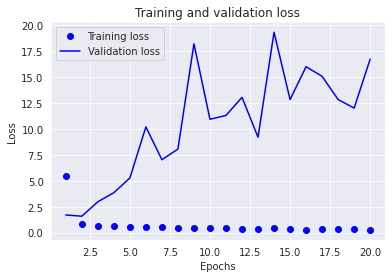

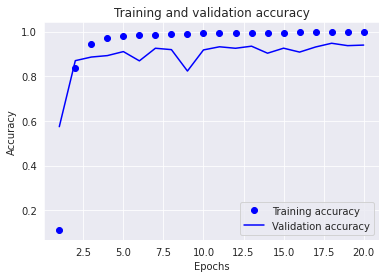

In [63]:
plot_history()

## Confusion matrix





454/454 [==============================] - 14s 31ms/step
Classification Report:
----------------------
                      precision    recall  f1-score   support

     Apple Golden 2       0.71      0.73      0.72       164
         Grape Blue       0.95      1.00      0.98       148
       Pear Monster       0.79      0.69      0.73       160
         Granadilla       0.67      1.00      0.80       164
             Banana       0.82      0.78      0.80       161
          Blueberry       0.79      1.00      0.88       164
 Apple Crimson Snow       1.00      1.00      1.00       152
              Guava       1.00      0.99      0.99       164
             Lychee       0.86      1.00      0.93       164
      Cucumber Ripe       0.99      0.85      0.92       144
       Avocado ripe       1.00      1.00      1.00       166
           Kohlrabi       1.00      0.69      0.82       164
           Cherry 2       1.00      1.00      1.00       219
               Corn       0.99      1.00 

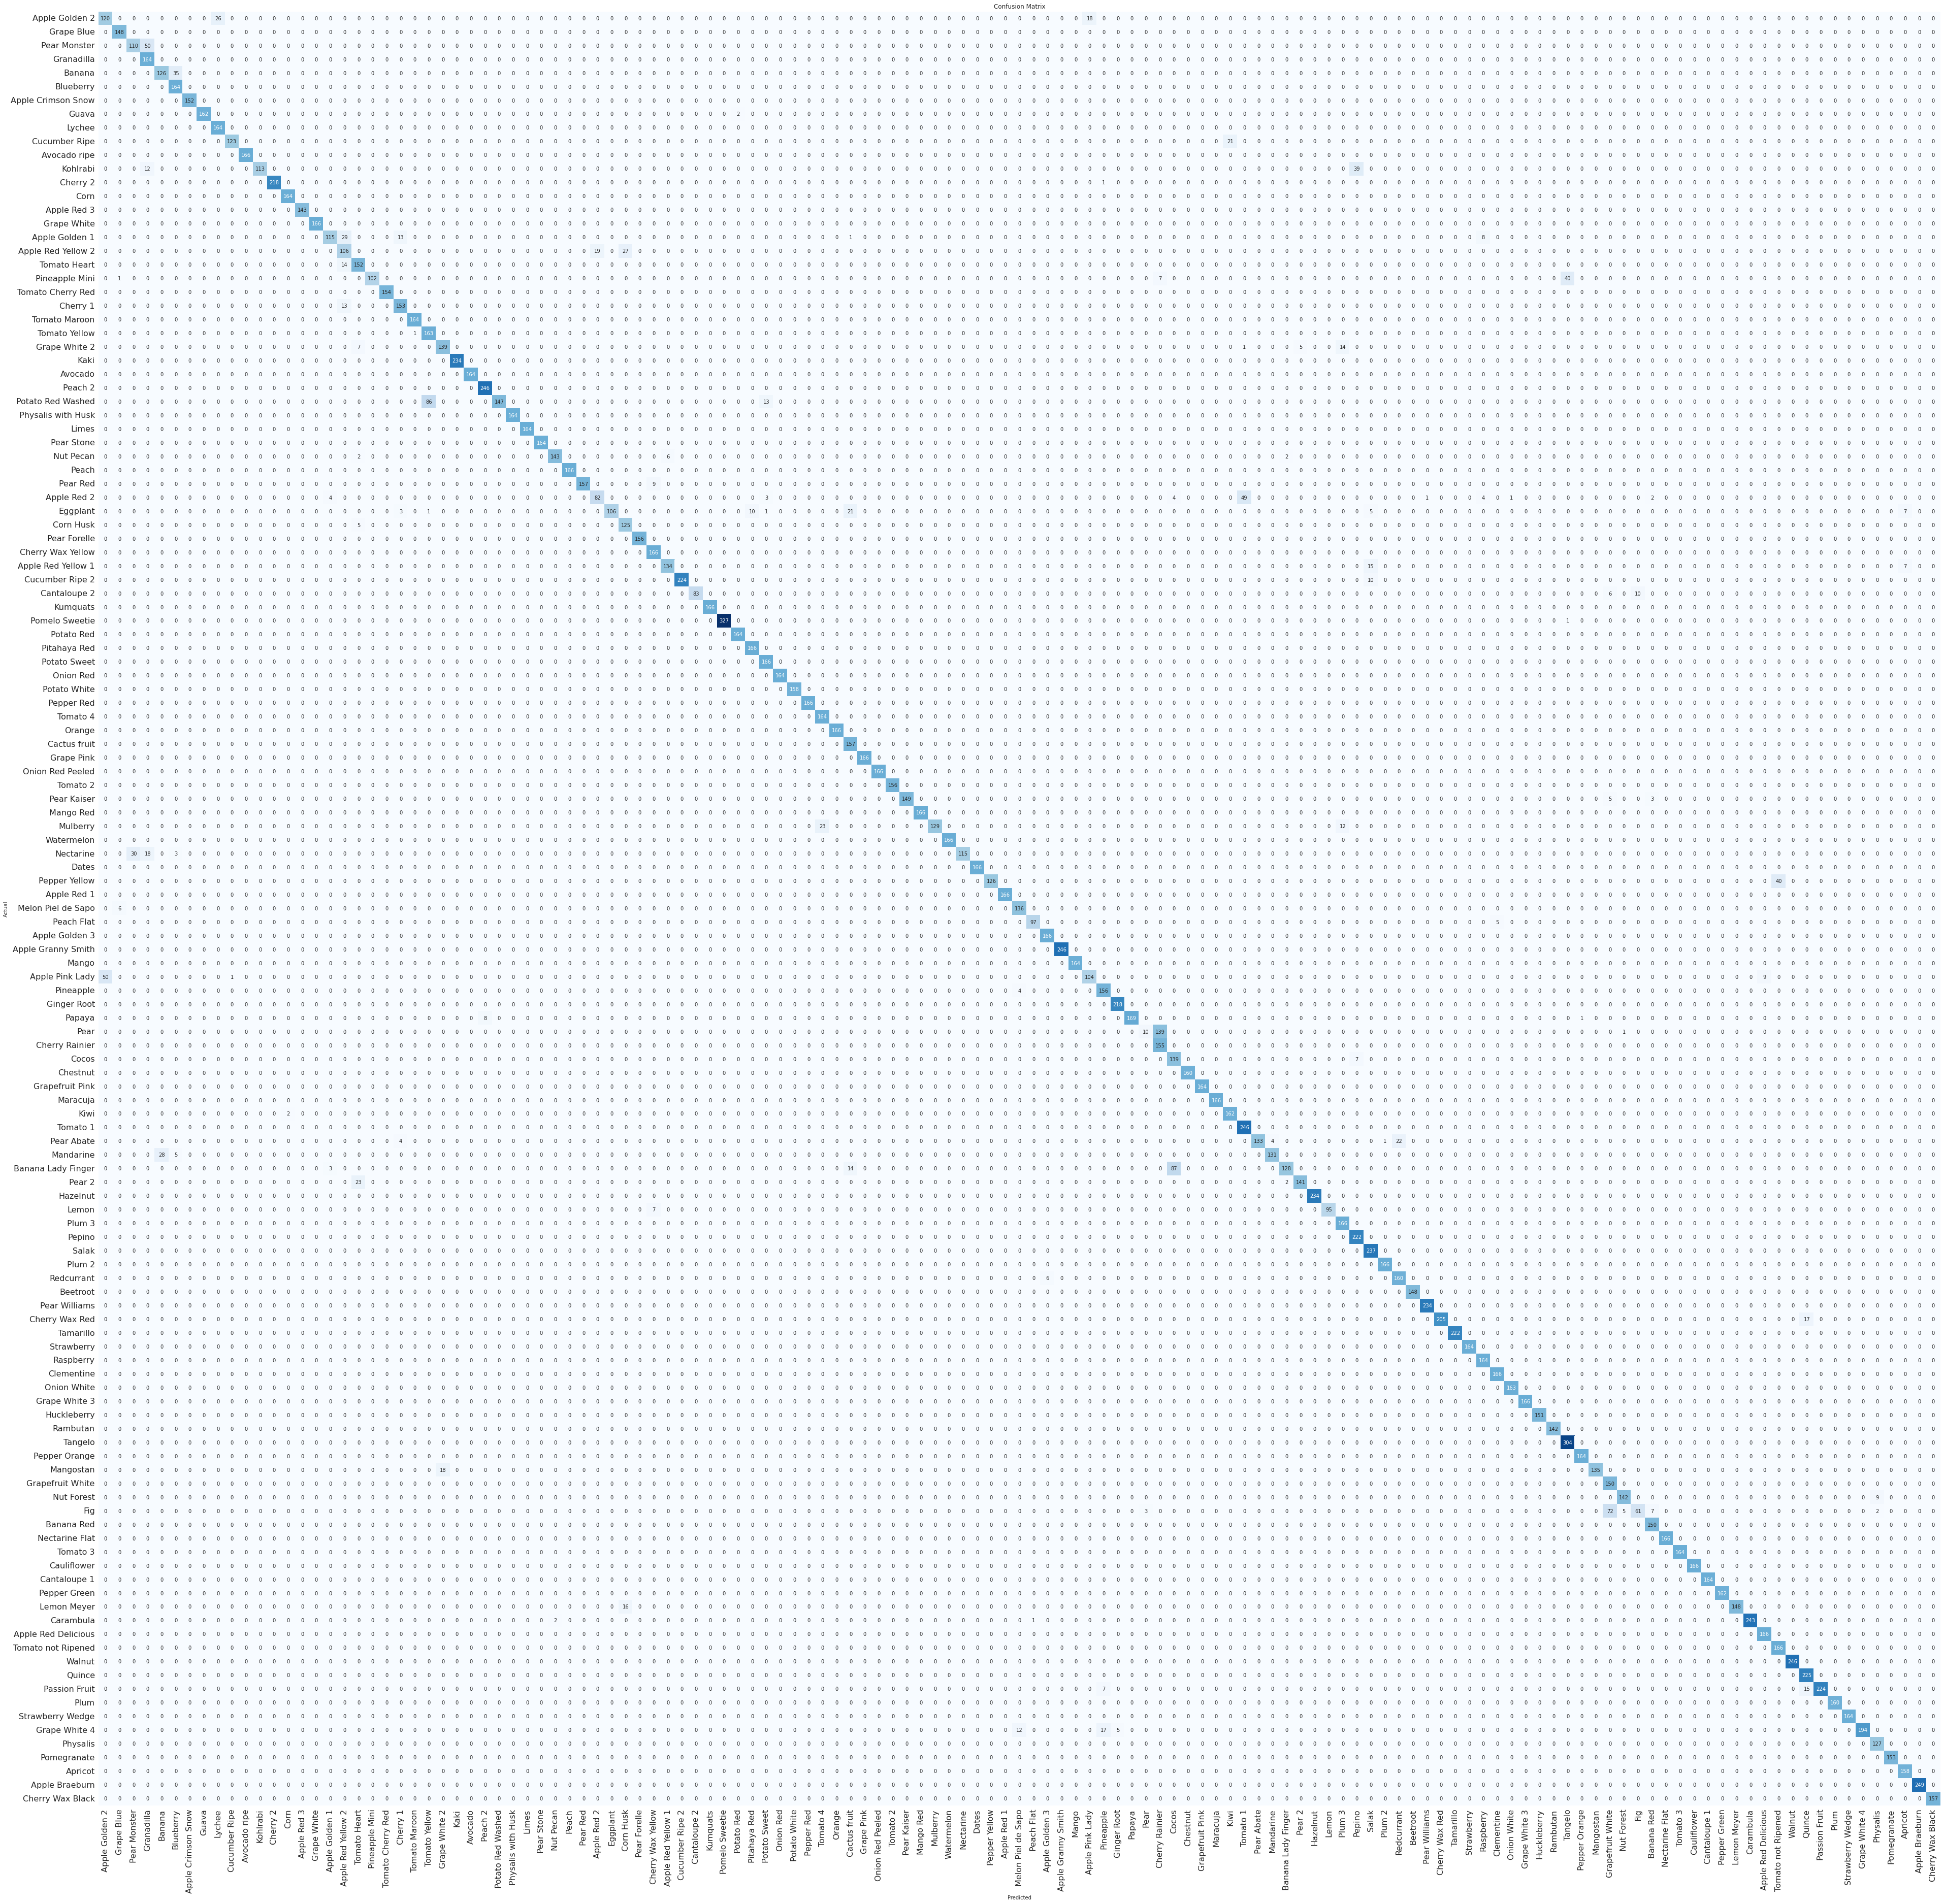

In [64]:
# Credit: https://stackoverflow.com/questions/69239296/how-to-get-confusion-matrix-and-roc-curve-when-using-flow-from-directory

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')
def cm_cr(test_data_gen, model):
    preds=model.predict(test_data_gen)    
    labels=test_data_gen.labels
    classes=list(test_data_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_data_gen, model)


## Evaluation of test accuracy

In [65]:
print(f"Model test accuracy: {test_acc}")
print(f"Model test loss: {test_loss}")

Model test accuracy: 0.9423999786376953
Model test loss: 20.645986557006836
